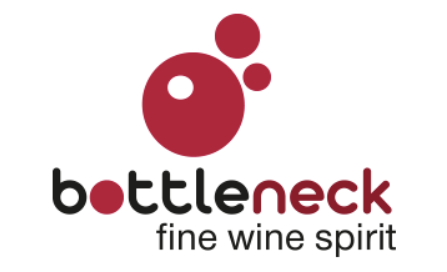

In [42]:
from IPython.display import Image
Image(filename="C:/Users/levog/OneDrive/Documents/Data Analyst/Projet 5 - Optimisez la gestion des données d\'une boutique avec R ou Python/Logo.png") 

# Sommaire :

**Partie 1 :** <a href="#A1">Importation et lecture des données</a>

- <a href="#C1">Importation des modules et des données</a>

**Partie 2 :** <a href="#A2">Nettoyage des données</a>

- <a href="#C2">Nettoyage dataframe *web*</a>
- <a href="#C3">Nettoyage dataframe *liaison*</a>
- <a href="#C4">Jointure dataframes</a>
- <a href="#C5">Mise en forme du dataframe</a>

**Partie 3 :** <a href="#A3">Analyse des données</a>

- <a href="#C6">Calcul du chiffre d'affaires</a>
- <a href="#C7">Représentation de la variable 'prix unitaire'</a>
- <a href="#C8">Détection des outliers</a>
 - <a href="#D1">Méthode écart interquartile</a>
 - <a href="#D2">Mesures z-score</a>
- <a href="#C9">Analyse univariée des prix unitaires</a>
 - <a href="#D3">Mesures de tendance centrale</a>
 - <a href="#D4">Mesures de dispersion</a>
 - <a href="#D5">Mesures de forme</a>
 - <a href="#D6">Mesures de concentration</a>
- <a href="#C10">Analyse bivariée du prix unitaire et du nombre de ventes</a>

# <a name ="A1">*Partie 1 :* importation et lecture des données</a>

## <a name="C1">Importation des modules et des données</a>

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [44]:
#lecture fichier 'erp'
erp = pd.read_excel("C:/Users/levog/OneDrive/Documents/Data Analyst/Projet 5 - Optimisez la gestion des données d'une boutique avec R ou Python/Data/erp.xlsx")
erp.head()

C:\Users\levog\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [45]:
#lecture fichier 'web'
web = pd.read_excel("C:/Users/levog/OneDrive/Documents/Data Analyst/Projet 5 - Optimisez la gestion des données d'une boutique avec R ou Python/Data/web.xlsx")
web.head()

C:\Users\levog\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [46]:
web2 = web[web['sku'].isnull()]
web2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        
 13  post

In [47]:
web2[web2['total_sales'].notnull()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [48]:
#lecture fichier 'liaison'
liaison = pd.read_excel("C:/Users/levog/OneDrive/Documents/Data Analyst/Projet 5 - Optimisez la gestion des données d'une boutique avec R ou Python/Data/liaison.xlsx")
liaison.head()

C:\Users\levog\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


# <a name ="A2">*Partie 2 :* nettoyage des données</a>

## <a name="C2">Nettoyage dataframe *web*</a>

### Vérification de l'unicité de la clé primaire

In [49]:
#analyse dataframe 'web'
print("L'échantillon de web est de taille", web.shape)
print("Nombre de valeurs Sku == NaN dans le dataframe web :", web['sku'].isnull().sum())

L'échantillon de web est de taille (1513, 28)
Nombre de valeurs Sku == NaN dans le dataframe web : 85


Le nombre de valeurs NaN dans le dataframe *web* est de 85, il semble difficile de travailler avec ces données car nous ne pourrons pas les relier aux données du dataframe *erp*.

In [50]:
#suppression fichier valeur NaN
web = web[web['sku'].notna()]

In [51]:
def verif_cle(df, colonne):
    if len(df) == len(df.drop_duplicates([colonne])):
        print("Il y a autant de valeurs uniques dans la colonne", colonne, "que de valeurs totales dans le dataframe; cet attribut peut donc servir de clé primaire car elle respecte le principe d'unicité. Il reste", len(df), "enregistrements dans le dataframe."),
    else :
        print("Toutes les valeurs de la colonne", colonne, "ne sont pas uniques, cet attribut ne peut donc pas servir de clé primaire en l'état actuel des choses. Il y a", len(df), "enregistrements dans le dataframe web, et il n'en reste que", len(df.drop_duplicates([colonne])), "si on supprime les doublons.")    

In [52]:
verif_cle(web, 'sku')

Toutes les valeurs de la colonne sku ne sont pas uniques, cet attribut ne peut donc pas servir de clé primaire en l'état actuel des choses. Il y a 1428 enregistrements dans le dataframe web, et il n'en reste que 714 si on supprime les doublons.


In [53]:
web['post_type'].value_counts()

product       714
attachment    714
Name: post_type, dtype: int64

In [54]:
#suppression des doublons pour les principales caractéristiques
web = web.drop_duplicates(subset = ["sku", "virtual", "downloadable", "rating_count", "average_rating", "total_sales", "post_author", "post_date", "post_name"], keep = 'first')

In [55]:
verif_cle(web, 'sku')

Il y a autant de valeurs uniques dans la colonne sku que de valeurs totales dans le dataframe; cet attribut peut donc servir de clé primaire car elle respecte le principe d'unicité. Il reste 714 enregistrements dans le dataframe.


### Détection 'sku' non-numériques

In [56]:
#Détection valeurs numériques
web_id = web.applymap(np.isreal)

In [57]:
#Recherche valeurs non-numériques
web[web_id['sku']==False]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [58]:
print(liaison[liaison['id_web']=='bon-cadeau-25-euros'])
print(liaison[liaison['id_web']=='13127-1'])

     product_id               id_web
443        4954  bon-cadeau-25-euros
     product_id   id_web
822        7247  13127-1


### Suppression données non-analysables

In [59]:
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


Nous constatons que les colonnes *virtual*,	*downloadable*, *rating_count*	et *average_rating*	sont totalement vides et donc inexploitables, nous allons supprimer ces attributs ainsi que ceux qui ne nous servirons pas à l'analyse.

In [60]:
#conservation des attributs exploitables
web = web[['sku', 'total_sales', 'post_name']]

## <a name="C3">Nettoyage dataframe *liaison*</a>

In [61]:
#renommage colonnes et suppression valeurs NaN
liaison = liaison.rename(columns = {'product_id': 'product_id', 'id_web': 'sku'})
liaison = liaison[liaison['sku'].notna()]
liaison = liaison[liaison['product_id'].notna()]

## <a name="C4">Jointure dataframes</a>

In [62]:
#jointure des 3 dataframes de base
df_bdd = web.merge(liaison, how='inner', on='sku')
df_bdd = df_bdd.merge(erp, how='inner', on='product_id')
df_bdd

,sku,total_sales,post_name,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros,4954,1,25.0,0,instock
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,3847,1,24.2,0,outofstock
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,3849,1,34.3,0,outofstock
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,3850,1,20.8,0,outofstock
4,19814,3.0,pierre-jean-villa-igp-gamine-2018,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...
709,16135,5.0,mouthes-le-bihan-aime-chai-2015,6930,1,8.4,83,instock
710,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,7023,1,27.5,15,instock
711,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,7025,1,69.0,2,instock
712,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,7247,1,54.8,23,instock


Nous utilisons ici une jointure de type *inner* entre l'attribut **sku** et l'attribut **id_product** car nous aurons besoin de travailler sur des références dont nous connaissons la clé que ce soit sur la boutique en ligne et sur le CMS afin de pouvoir joindre les attributs.

Si l'une de ces 2 informations manquent, nous ne pourrons pas faire le lien entre toutes les caractéristiques d'un produit et nous ne pourrons pas l'analyser.

In [63]:
#Vérification valeurs NaN
print("Le nombre de valeurs NaN de l'attribut sku est :", df_bdd['sku'].isnull().sum())
print("Le nombre de valeurs NaN de l'attribut product_id est :", df_bdd['product_id'].isnull().sum())

Le nombre de valeurs NaN de l'attribut sku est : 0
Le nombre de valeurs NaN de l'attribut product_id est : 0


In [82]:
df_bdd.loc[df_bdd['product_id']==4954]

,product_id,total_sales,post_name,onsale_web,price,stock_quantity,stock_status,sales_revenue
0,4954,10.0,bon-cadeau-de-25-euros,1,25.0,0,instock,250.0


Au passage, nous pouvons vérifier que le bon cadeau a bien été conservé dans la jointure. C'est le cas, et on constate que 10 ventes ont été des bons cadeaux, et donc que 250€ du CA concernera ces bons.

## <a name="C5">Mise en forme du dataframe</a>

In [65]:
#déplacement de la colonne "product_id" à gauche du dataframe
df_bdd = df_bdd.drop(['sku'], axis=1)
first_column = df_bdd.pop('product_id')
df_bdd.insert(0, 'product_id', first_column) 

In [66]:
#création d'une colonne CA
df_bdd['sales_revenue'] = df_bdd['total_sales']*df_bdd['price']
df_bdd.sort_values(by = 'sales_revenue', ascending=False).head()

,product_id,total_sales,post_name,onsale_web,price,stock_quantity,stock_status,sales_revenue
195,4334,96.0,champagne-gosset-grand-blanc-de-blanc,1,49.0,0,outofstock,4704.0
72,4144,87.0,champagne-gosset-grand-rose,1,49.0,11,instock,4263.0
219,4402,13.0,cognac-frapin-vip-xo,1,176.0,8,instock,2288.0
71,4142,30.0,champagne-gosset-grand-millesime-2006,1,53.0,8,instock,1590.0
70,4141,40.0,gosset-champagne-grande-reserve,1,39.0,1,instock,1560.0


# <a name ="A3">*Partie 3 :* analyse des données</a>

## <a name="C6">Calcul du chiffre d'affaires</a>

In [67]:
#calcul du CA total
print("Le Chiffre d'Affaires total est de ", df_bdd['sales_revenue'].sum(), "€.")

Le Chiffre d'Affaires total est de  70568.6 €.


## <a name="C7">Représentation de la variable 'prix unitaire'</a>

<AxesSubplot:>

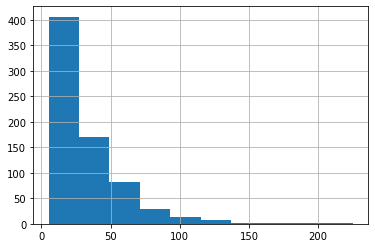

In [68]:
#Histogramme en barres des prix
df_bdd['price'].hist()

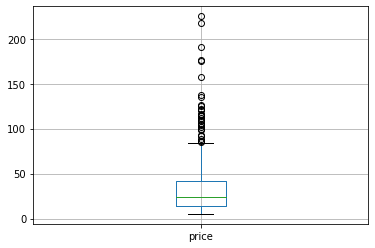

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [69]:
#Boxplot des prix
df_bdd.boxplot(column="price", vert=True)
plt.show()
df_bdd['price'].describe()

**Constat** : Nous confirmons avec la fonction *describe* ce que nous interprétons sur les boxplots. La médiane se situe aux alentours de 24€, et la moitié des valeurs se situe entre 14€ et 42€, nous en déduisons dans ce cas que l'écart interquartile est de 28.

Nous constatons également un nombre important d'outliers dans le dernier décile, qui semblerait être des valeurs atypiques et non aberrantes, d'une part car cela concerne un grand nombre de valeurs légèrement au-dessus de la 1ère barre du boxplot et non une seule valeur très largement au-dessus des autres, d'autre part car cela concerne des prix unitaires qui n'ont pas de lien les uns avec les autres, il n'y a donc rien d'incohérent de voir ces disparités.

Nous allons par la suite créer un dataframe avec ces outliers, où nous verrons qu'il s'agit de champagne et de grand cru, a priori ces écarts de prix sont justifiés.

## <a name="C8">Détection des outliers</a>

### <a name="D1">Méthode écart interquartile</a>

In [70]:
#Méthode écart interquartile : Q3 + 1,5 EI
outliers1 = df_bdd.loc[df_bdd['price'] > (np.percentile(df_bdd['price'], 75)+(np.percentile(df_bdd['price'], 75)-np.percentile(df_bdd['price'], 25))*1.5)]
outliers1.sort_values(by=['price'], ascending=False)

,product_id,total_sales,post_name,onsale_web,price,stock_quantity,stock_status,sales_revenue
200,4352,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1,225.0,0,outofstock,1125.0
426,5001,0.0,david-duband-charmes-chambertin-grand-cru-2014,1,217.5,20,instock,0.0
587,5892,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,1,191.3,10,instock,573.9
219,4402,13.0,cognac-frapin-vip-xo,1,176.0,8,instock,2288.0
553,5767,0.0,camille-giroud-clos-de-vougeot-2016,1,175.0,12,instock,0.0
222,4406,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,1,157.0,3,instock,0.0
382,4904,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,1,137.0,13,instock,685.0
642,6126,2.0,champagne-gosset-celebris-vintage-2007,1,135.0,10,instock,270.0
202,4355,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1,126.5,2,instock,1391.5
511,5612,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,1,124.8,12,instock,0.0


### <a name="D2">Méthode z-score</a>

In [71]:
# Méthode z-score : (x-moyenne) / écart-type
mean = df_bdd['price'].mean()
std = df_bdd['price'].std()

liste_outlier = []
for i in df_bdd['price']:
    z = (i-mean)/std
    if z > 3:
        liste_outlier.append(i)
print('Les outliers de ce dataframe sont', liste_outlier)

Les outliers de ce dataframe sont [225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 135.0, 116.4, 121.0, 121.0]


In [72]:
outliers2 = df_bdd[df_bdd.price.isin(liste_outlier)]
outliers2.sort_values(by=['price'], ascending=False)

,product_id,total_sales,post_name,onsale_web,price,stock_quantity,stock_status,sales_revenue
200,4352,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1,225.0,0,outofstock,1125.0
426,5001,0.0,david-duband-charmes-chambertin-grand-cru-2014,1,217.5,20,instock,0.0
587,5892,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,1,191.3,10,instock,573.9
219,4402,13.0,cognac-frapin-vip-xo,1,176.0,8,instock,2288.0
553,5767,0.0,camille-giroud-clos-de-vougeot-2016,1,175.0,12,instock,0.0
222,4406,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,1,157.0,3,instock,0.0
382,4904,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,1,137.0,13,instock,685.0
642,6126,2.0,champagne-gosset-celebris-vintage-2007,1,135.0,10,instock,270.0
202,4355,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1,126.5,2,instock,1391.5
511,5612,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,1,124.8,12,instock,0.0


**Constat** : Selon la méthode de détection des outliers, le nombre d'outliers est différent, il est de 32 valeurs avec la méthode interquartile utilisée (le prix le plus bas étant 85,60 €) et de 14 valeurs avec la méthode z-score (le prix le plus bas étant 116,40€).

Il faut savoir qu'il peut y avoir une différence du nombre de valeurs y compris en utilisant la même méthode, par exemple si on multiplie le troisième quartile par un autre chiffre que 1,5 pour la méthode interquartile (1,5 étant la valeur utilisé de façon conventionnelle) ou si l'on détermine une autre valeur que 3 au dessus de laquelle le z-score détermine un outlier (la valeur 2 par exemple aurait fait ressortir 30 outliers).

## <a name="C9">Analyse univariée des prix unitaires</a>

### <a name="D3">Mesures de tendance centrale</a>

In [73]:
#Analyse des prix unitaires
print("La moyenne est :", df_bdd['price'].mean())
print("La médiane est :", df_bdd['price'].median())
print("Le mode est :", df_bdd['price'].mode())

La moyenne est : 32.49313725490197
La médiane est : 23.55
Le mode est : 0    19.0
Name: price, dtype: float64


**Constat :** On constate une moyenne de 32,49€ alors que la médiane est de 23,55€, c'est-à-dire qu'il y a autant de valeurs inférieures que supérieures. La moyenne étant plus élevée que la médiane, il y a sans doute quelques outliers en tant que valeurs maximales qui gonflent cette moyenne, mais un nombre plus important de produits dont le prix est inférieur à cette moyenne.

Le mode, donc la valeur la plus présente, est de 19€. Or, la grande majorité de ces valeurs étant unique, étant donné que l'on est sur une variable quantitative continue, cette valeur a assez peu d'intérêt telle quelle, elle en aurait eu davantage si on avait agrégé cette valeur en classe, comme sur l'histogramme de prix ci-dessus, pour connaître la classe de prix la plus présente.

Toutes ces valeurs étant éloignées les une des autres, elles ne sont pas représentatives les unes indépendamment des autres. Nous allons maintenant étudier les valeurs de dispersion pour creuser l'analyse.

### <a name="D4">Mesures de dispersion</a>

In [74]:
#Analyse des prix unitaires
print("La variance est :", df_bdd['price'].var())
print("La variance est :", df_bdd['price'].var(ddof=0), "si l'on corrige le biais.")
print("L'écart-type est :", df_bdd['price'].std())
print("Le coefficient de variation est :", df_bdd['price'].std() / df_bdd['price'].mean())

La variance est : 773.4252964551889
La variance est : 772.342067748669 si l'on corrige le biais.
L'écart-type est : 27.810524922323722
Le coefficient de variation est : 0.85588918989742


**Constat** : La variance empirique sans biais, plus fiable que la variance non corrigée, est de 772,34.

L'écart-type, qui correspond à la moyenne des écarts à la moyenne est de 27,81. Pour une moyenne de 32,49€, le coefficient de variation est de 85,59%.

### <a name="D5">Mesures de forme</a>

In [75]:
print("Le skewness est :",df_bdd['price'].skew())
print("Le kurtosis est :", df_bdd['price'].kurtosis())

Le skewness est : 2.5809012630033705
Le kurtosis est : 10.088392064977292


**Constat :** Nous remarquons que pour le Skewness empirique, le γ1 est supérieur à 0, ce qui indique donc que la distribution n'est pas symétrique mais est étalée vers la droite, ce qui est confirmé sur l'histogramme précédent.

Le Kurtosis, appelé γ2, est également positif, ce qui indique que la distribution est moins aplatie que la distribution normale, donc les valeurs sont plus concentrées.

### <a name="D6">Mesures de concentration</a>

Après avoir analysé les prix unitaires des produits, il semblerait maintenant pertinent d'analyser la répartition des ventes par produit afin de savoir si le chiffre d'affaires est très concentré sur un faible nombre de produits ou plutôt homogènement réparti.

Nous allons étudier cela grâce à la courbe de Lorenz

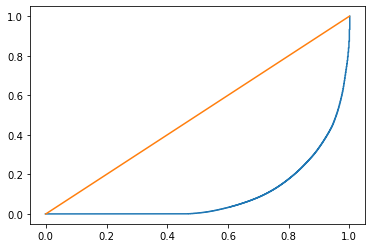

In [76]:
#Traçage de la courbe de Lorenz
ca = df_bdd['sales_revenue'].values
n = len(ca)

lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0], lorenz)

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])
plt.show()

In [77]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("L'indice de Gini est de :", gini)

L'indice de Gini est de : 0.8050420469738444


**Constat :** La courbe de Lorenz ci-dessus nous permet de nous rendre compte de la concentration des ventes par produit. L'indice de Gini, de 0.81, donc proche de 1, est plutôt élevé, ce qui signifie que les ventes sont concentrés sur certains produits.

En effet, on remarque sur la courbe que 0,8 sur l'axe des abscisses correspond environ à 0,2 sur l'axe des ordonnées, ce qui signifie que les 20% des produits qui rapportent le plus de CA représentent 80% du chiffre d'affaires.

## <a name="C10">Analyse bivariée du prix unitaire et du nombre de ventes</a>

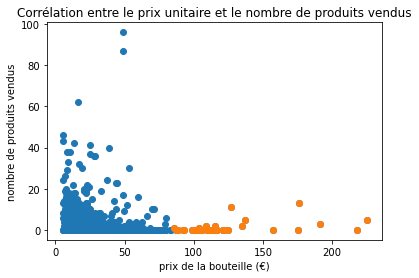

In [78]:
#Création du scatterplot entre le prix unitaire et le nombre de ventes par produit
plt.plot(df_bdd["price"],df_bdd["total_sales"],'o')
plt.plot(outliers1["price"],outliers1["total_sales"],'o')
plt.xlabel("prix de la bouteille (€)")
plt.ylabel("nombre de produits vendus")
plt.title("Corrélation entre le prix unitaire et le nombre de produits vendus")
plt.show()

**Constat :** Il n'est pas forcément simple de trouver une corrélation précise entre le prix d'un article et le nombre de ses ventes pour trouver une causalité entre les deux, cependant, nous remarquons que les produits les plus vendus sont parmi les produits les moins chers.
J'apporterai une limite à cette conclusion notamment du fait que la grande majorité des produits coûte moins de 50€ et que peu de produits coûtent plus de 100€, il est donc normal que, en proportion, il y avait plus de probabilité que certains des produits les moins chers soient parmi les plus vendus. Aussi, les points sont très serrés à cette zone du graphique, ce qui rend également difficile une analyse plus poussée sur ces produits.

In [79]:
taille_classe = 50

groupes = []

tranches = np.arange(0, max(df_bdd['price']), taille_classe)
tranches += taille_classe/2
indices = np.digitize(df_bdd["price"], tranches)

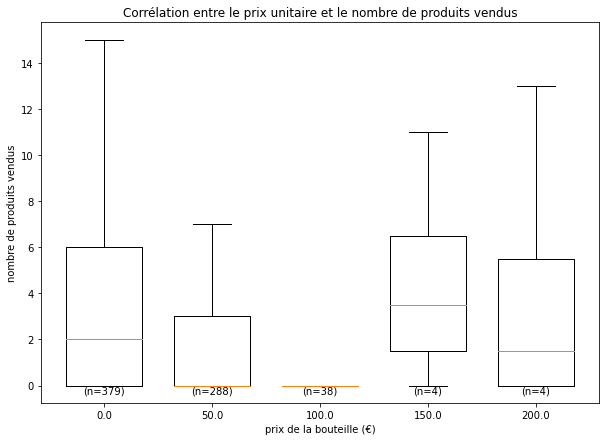

In [80]:
for ind, tr in enumerate(tranches):
    prix = df_bdd.loc[indices==ind, "total_sales"]
    if len(prix) > 0:
        g = {
            'valeurs': prix,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(prix),
            'quartiles': [np.percentile(prix,p) for p in [25,50,75]]
        }
        groupes.append(g)
        
plt.figure(figsize=(10,7))

plt.boxplot([g["valeurs"] for g in groupes],
            positions = [g["centre_classe"] for g in groupes],
            showfliers = False,
            widths = taille_classe*0.7)

for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')
    plt.title("Corrélation entre le prix unitaire et le nombre de produits vendus")
    plt.xlabel("prix de la bouteille (€)")
    plt.ylabel("nombre de produits vendus")

plt.show()